In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='roberta-large'

# the commands below didn't work inside for loop and got CUDA out of memory Error.
#     with torch.no_grad():
#        torch.cuda.empty_cache()
#    del data, model, trainer, acc, f1
# Instead of running these commands in a loop, execute them cell by cell, restarting between them.
# Each cell will print its results. To keep the results and avoid re-running specific cells, skip them intermittently on each run.

In [3]:
results = {'acc':[],
           'f1':[],
           'r':[]}

In [4]:
lr = 1.0e-5
g = 2
lora_alpha = 8
r = 4
lora_dropout = 0.0
wd = 0.0


print(f'Grid search {model_checkpoint}, lr: {lr}. Focal loss gamma: {g}. Weight decay {wd}. Lora rank: {r}')
data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,batch_size=16)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,
                            num_labels=data.num_labels,
                            lora=True,
                            r=r,
                            alpha=lora_alpha,
                            dropout=lora_dropout)
trainer = Engine(epochs=10,labels=data.labels)
trainer.model = model.model
trainer.dataset_encoded = data.dataset_encoded
acc, f1 = trainer.run(lr=lr,
                        wd=0.0,
                        train_dataloader=data.train_dataloader,
                        eval_dataloader=data.eval_dataloader,
                        test_dataloader=data.test_dataloader,
                        focalloss=True,
                        early_stop=3,
                        accumulation_steps=2,
                        gamma=g)
results['acc'].append(acc)
results['f1'].append(f1)
results['r'].append(r)
print('### '*10)
print(results)
print('### '*10)

Grid search roberta-large, lr: 1e-05. Focal loss gamma: 2. Weight decay 0.0. Lora rank: 4


Map:   0%|          | 0/256 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.1824	Val Loss:	0.7065	Accuracy:	0.2691	F1:	0.2251
2 / 10: Train Loss:	0.1767	Val Loss:	0.7004	Accuracy:	0.3479	F1:	0.3336
3 / 10: Train Loss:	0.1744	Val Loss:	0.6962	Accuracy:	0.4508	F1:	0.4497
4 / 10: Train Loss:	0.1727	Val Loss:	0.6947	Accuracy:	0.4945	F1:	0.4936
5 / 10: Train Loss:	0.1719	Val Loss:	0.6928	Accuracy:	0.5120	F1:	0.5109
6 / 10: Train Loss:	0.1695	Val Loss:	0.6863	Accuracy:	0.5864	F1:	0.5776
7 / 10: Train Loss:	0.1656	Val Loss:	0.6724	Accuracy:	0.6893	F1:	0.6566
8 / 10: Train Loss:	0.1641	Val Loss:	0.6716	Accuracy:	0.6849	F1:	0.6628
9 / 10: Train Loss:	0.1595	Val Loss:	0.6417	Accuracy:	0.7374	F1:	0.6832
10 / 10: Train Loss:	0.1528	Val Loss:	0.6139	Accuracy:	0.7549	F1:	0.6901
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.53      0.57      0.55       119
      struct       0.84      0.82      0.83       338

    accuracy                           0.75       457
   macro avg      

In [4]:
lr = 1.0e-5
g = 2
lora_alpha = 8
r = 8
lora_dropout = 0.0
wd = 0.0


print(f'Grid search {model_checkpoint}, lr: {lr}. Focal loss gamma: {g}. Weight decay {wd}. Lora rank: {r}')
data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,batch_size=16)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,
                            num_labels=data.num_labels,
                            lora=True,
                            r=r,
                            alpha=lora_alpha,
                            dropout=lora_dropout)
trainer = Engine(epochs=30,labels=data.labels)
trainer.model = model.model
trainer.dataset_encoded = data.dataset_encoded
acc, f1 = trainer.run(lr=lr,
                        wd=0.0,
                        train_dataloader=data.train_dataloader,
                        eval_dataloader=data.eval_dataloader,
                        test_dataloader=data.test_dataloader,
                        focalloss=True,
                        early_stop=3,
                        accumulation_steps=2,
                        gamma=g)
results['acc'].append(acc)
results['f1'].append(f1)
results['r'].append(r)
print('### '*10)
print(results)
print('### '*10)

Grid search roberta-large, lr: 1e-05. Focal loss gamma: 2. Weight decay 0.0. Lora rank: 8


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.1824	Val Loss:	0.7064	Accuracy:	0.2691	F1:	0.2251
2 / 30: Train Loss:	0.1767	Val Loss:	0.7003	Accuracy:	0.3523	F1:	0.3389
3 / 30: Train Loss:	0.1743	Val Loss:	0.6960	Accuracy:	0.4530	F1:	0.4520
4 / 30: Train Loss:	0.1726	Val Loss:	0.6946	Accuracy:	0.4945	F1:	0.4936
5 / 30: Train Loss:	0.1717	Val Loss:	0.6922	Accuracy:	0.5208	F1:	0.5187
6 / 30: Train Loss:	0.1692	Val Loss:	0.6845	Accuracy:	0.6083	F1:	0.5959
7 / 30: Train Loss:	0.1648	Val Loss:	0.6693	Accuracy:	0.7002	F1:	0.6651
8 / 30: Train Loss:	0.1630	Val Loss:	0.6666	Accuracy:	0.6958	F1:	0.6708
9 / 30: Train Loss:	0.1579	Val Loss:	0.6350	Accuracy:	0.7462	F1:	0.6882
10 / 30: Train Loss:	0.1508	Val Loss:	0.6071	Accuracy:	0.7593	F1:	0.6956
11 / 30: Train Loss:	0.1453	Val Loss:	0.5952	Accuracy:	0.7746	F1:	0.7157
12 / 30: Train Loss:	0.1468	Val Loss:	0.5841	Accuracy:	0.7790	F1:	0.7169
13 / 30: Train Loss:	0.1462	Val Loss:	0.5859	Accuracy:	0.7724	F1:	0.7255
14 / 30: Train Loss:	0.1403	Val Loss:	0.5845	Accuracy:	0.770

In [4]:
lr = 1.0e-5
g = 2
lora_alpha = 8
r = 16
lora_dropout = 0.0
wd = 0.0


print(f'Grid search {model_checkpoint}, lr: {lr}. Focal loss gamma: {g}. Weight decay {wd}. Lora rank: {r}')
data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,batch_size=16)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,
                            num_labels=data.num_labels,
                            lora=True,
                            r=r,
                            alpha=lora_alpha,
                            dropout=lora_dropout)
trainer = Engine(epochs=30,labels=data.labels)
trainer.model = model.model
trainer.dataset_encoded = data.dataset_encoded
acc, f1 = trainer.run(lr=lr,
                        wd=0.0,
                        train_dataloader=data.train_dataloader,
                        eval_dataloader=data.eval_dataloader,
                        test_dataloader=data.test_dataloader,
                        focalloss=True,
                        early_stop=3,
                        accumulation_steps=2,
                        gamma=g)
results['acc'].append(acc)
results['f1'].append(f1)
results['r'].append(r)
print('### '*10)
print(results)
print('### '*10)

Grid search roberta-large, lr: 1e-05. Focal loss gamma: 2. Weight decay 0.0. Lora rank: 16


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.1824	Val Loss:	0.7065	Accuracy:	0.2691	F1:	0.2251
2 / 30: Train Loss:	0.1767	Val Loss:	0.7004	Accuracy:	0.3479	F1:	0.3336
3 / 30: Train Loss:	0.1744	Val Loss:	0.6963	Accuracy:	0.4508	F1:	0.4497
4 / 30: Train Loss:	0.1727	Val Loss:	0.6946	Accuracy:	0.4967	F1:	0.4958
5 / 30: Train Loss:	0.1718	Val Loss:	0.6926	Accuracy:	0.5164	F1:	0.5151
6 / 30: Train Loss:	0.1694	Val Loss:	0.6855	Accuracy:	0.5908	F1:	0.5804
7 / 30: Train Loss:	0.1652	Val Loss:	0.6708	Accuracy:	0.6937	F1:	0.6604
8 / 30: Train Loss:	0.1636	Val Loss:	0.6690	Accuracy:	0.6937	F1:	0.6689
9 / 30: Train Loss:	0.1587	Val Loss:	0.6383	Accuracy:	0.7462	F1:	0.6911
10 / 30: Train Loss:	0.1520	Val Loss:	0.6100	Accuracy:	0.7571	F1:	0.6905
11 / 30: Train Loss:	0.1456	Val Loss:	0.5964	Accuracy:	0.7724	F1:	0.7122
12 / 30: Train Loss:	0.1473	Val Loss:	0.5831	Accuracy:	0.7746	F1:	0.7082
13 / 30: Train Loss:	0.1464	Val Loss:	0.5857	Accuracy:	0.7746	F1:	0.7275
14 / 30: Train Loss:	0.1407	Val Loss:	0.5855	Accuracy:	0.765

In [4]:
lr = 1.0e-5
g = 2
lora_alpha = 8
r = 32
lora_dropout = 0.0
wd = 0.0


print(f'Grid search {model_checkpoint}, lr: {lr}. Focal loss gamma: {g}. Weight decay {wd}. Lora rank: {r}')
data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,batch_size=16)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,
                            num_labels=data.num_labels,
                            lora=True,
                            r=r,
                            alpha=lora_alpha,
                            dropout=lora_dropout)
trainer = Engine(epochs=10,labels=data.labels)
trainer.model = model.model
trainer.dataset_encoded = data.dataset_encoded
acc, f1 = trainer.run(lr=lr,
                        wd=0.0,
                        train_dataloader=data.train_dataloader,
                        eval_dataloader=data.eval_dataloader,
                        test_dataloader=data.test_dataloader,
                        focalloss=True,
                        early_stop=3,
                        accumulation_steps=2,
                        gamma=g)
results['acc'].append(acc)
results['f1'].append(f1)
results['r'].append(r)
print('### '*10)
print(results)
print('### '*10)

Grid search roberta-large, lr: 1e-05. Focal loss gamma: 2. Weight decay 0.0. Lora rank: 32


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.1824	Val Loss:	0.7064	Accuracy:	0.2691	F1:	0.2251
2 / 10: Train Loss:	0.1767	Val Loss:	0.7003	Accuracy:	0.3501	F1:	0.3363
3 / 10: Train Loss:	0.1744	Val Loss:	0.6962	Accuracy:	0.4508	F1:	0.4499
4 / 10: Train Loss:	0.1726	Val Loss:	0.6947	Accuracy:	0.4967	F1:	0.4957
5 / 10: Train Loss:	0.1717	Val Loss:	0.6924	Accuracy:	0.5186	F1:	0.5169
6 / 10: Train Loss:	0.1693	Val Loss:	0.6851	Accuracy:	0.5952	F1:	0.5843
7 / 10: Train Loss:	0.1651	Val Loss:	0.6703	Accuracy:	0.6915	F1:	0.6575
8 / 10: Train Loss:	0.1633	Val Loss:	0.6684	Accuracy:	0.6937	F1:	0.6689
9 / 10: Train Loss:	0.1584	Val Loss:	0.6370	Accuracy:	0.7484	F1:	0.6930
10 / 10: Train Loss:	0.1517	Val Loss:	0.6091	Accuracy:	0.7593	F1:	0.6925
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.54      0.56      0.55       119
      struct       0.84      0.83      0.84       338

    accuracy                           0.76       457
   macro avg      

In [5]:
results = {'acc': [0.74609375,0.76171875,0.76171875,0.75], 'f1': [0.6873062106548906,0.7236644193165933,0.7135257104070738,0.6908212560386473], 'r': [4,8,16,32]}

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

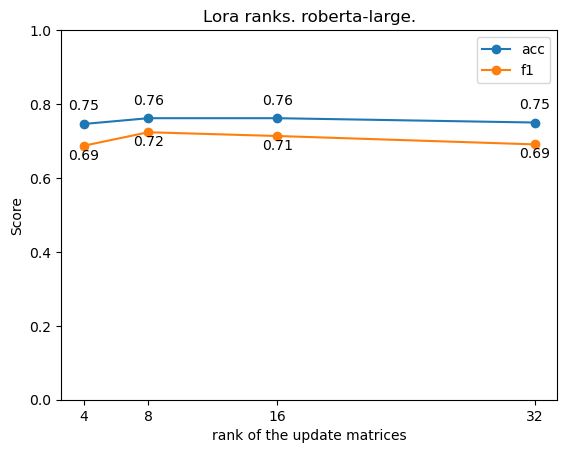

In [7]:
def plot_grid_search(df, title):

    # Create the plot
    ax = df.plot(x='r', y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row["r"], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row["r"], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df['r'], [val for val in df['r']], ha='center')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('rank of the update matrices')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Lora ranks. {model_checkpoint}.')